In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# partition training set into training and validation set
val_X = X_train[40000:,:]
train_X = X_train[:40000,:]
val_y = y_train[40000:,:]
train_y = y_train[:40000,:]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Define a convolutional neural network

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
#model.add(Activation('relu'))

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(AveragePooling2D(strides=(4, 4), padding = "same"))

model.add(Flatten())

model.add(Dense(10, activation = "softmax"))
#model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

Using real-time data augmentation.
Epoch 1/60
625/625 [==============================] - ETA: 0s - loss: 1.7853 - accuracy: 0.3229
Epoch 00001: val_accuracy improved from -inf to 0.43770, saving model to best_model.h5
625/625 [==============================] - 29s 43ms/step - loss: 1.7853 - accuracy: 0.3229 - val_loss: 1.5206 - val_accuracy: 0.4377
Epoch 2/60
625/625 [==============================] - ETA: 0s - loss: 1.4112 - accuracy: 0.4809
Epoch 00002: val_accuracy improved from 0.43770 to 0.53230, saving model to best_model.h5
625/625 [==============================] - 27s 43ms/step - loss: 1.4112 - accuracy: 0.4809 - val_loss: 1.2883 - val_accuracy: 0.5323
Epoch 3/60
625/625 [==============================] - ETA: 0s - loss: 1.2285 - accuracy: 0.5543
Epoch 00003: val_accuracy improved from 0.53230 to 0.58600, saving model to best_model.h5
625/625 [==============================] - 27s 43ms/step - loss: 1.2285 - accuracy: 0.5543 - val_loss: 1.1678 - val_accuracy: 0.5860
Epoch 4/60


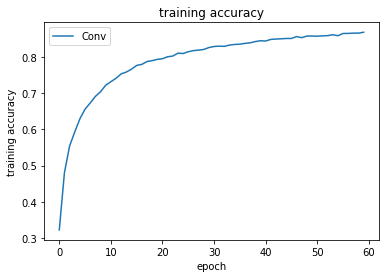

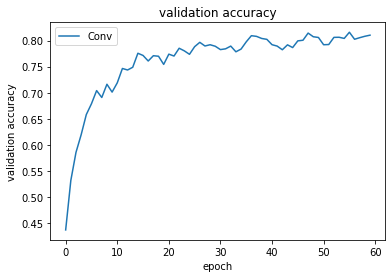

313/313 [==============================] - 3s 8ms/step - loss: 0.6472 - accuracy: 0.8043
Test accuracy: 0.8043000102043152


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
    )

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
it_train = datagen.flow(train_X, train_y, batch_size = 64)

steps = int(train_X.shape[0] / 64)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(it_train, 
                    steps_per_epoch=steps, 
                    epochs=60, 
                    validation_data=(val_X, val_y), 
                    verbose=1, 
                    callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

In [ ]:
extractor = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
activations = extractor(X_train)

In [ ]:
example = extractor.predict(np.expand_dims(X_train[0], axis = 0))
#activations = extractor.predict(X_train) # Returns a list of five Numpy arrays: one array per layer activation

The Example Image


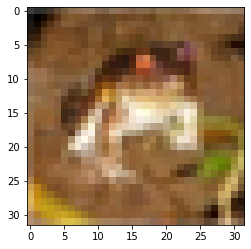

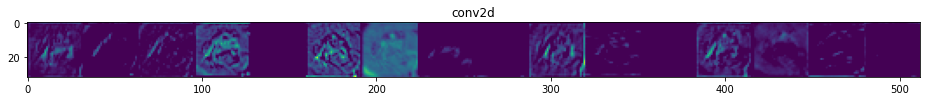

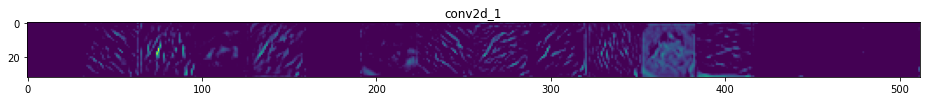

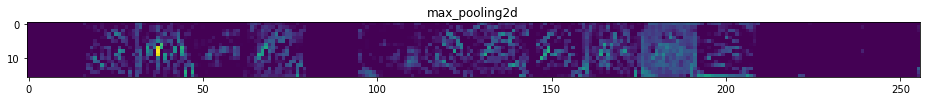

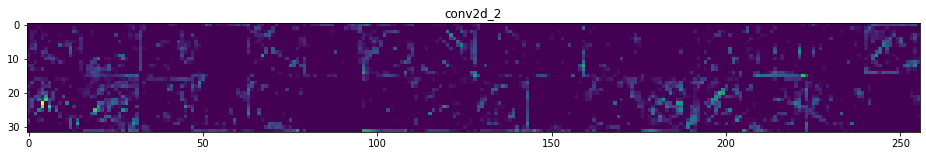

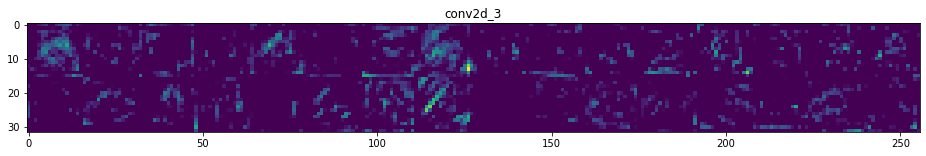

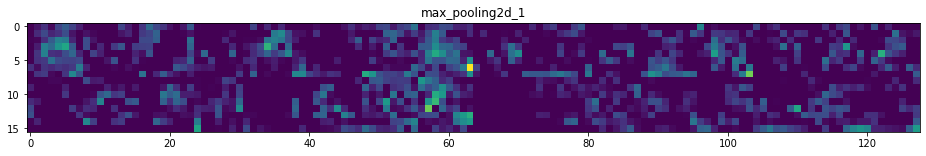

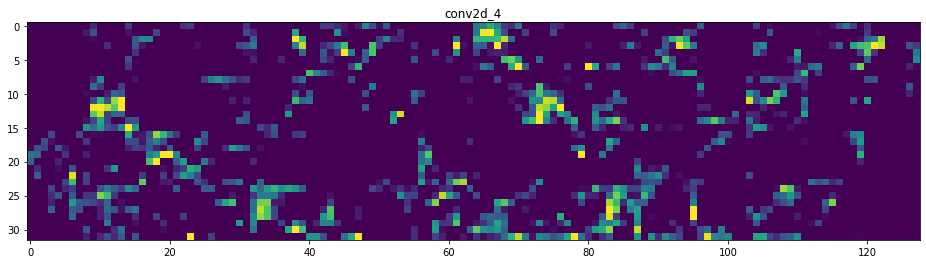

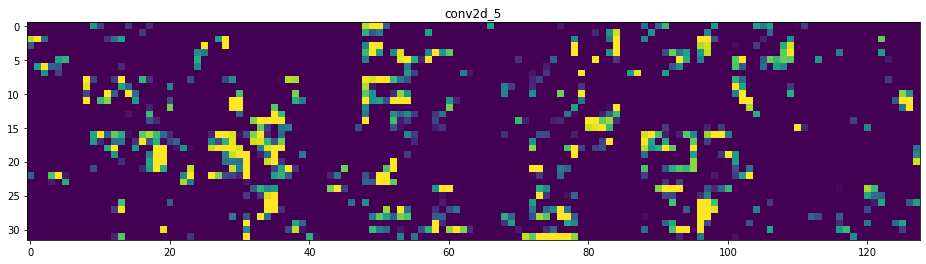

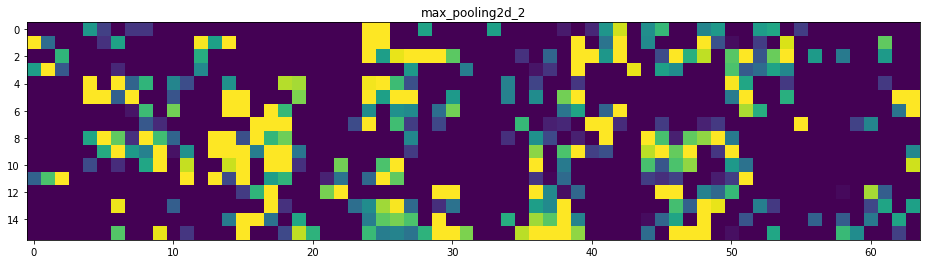

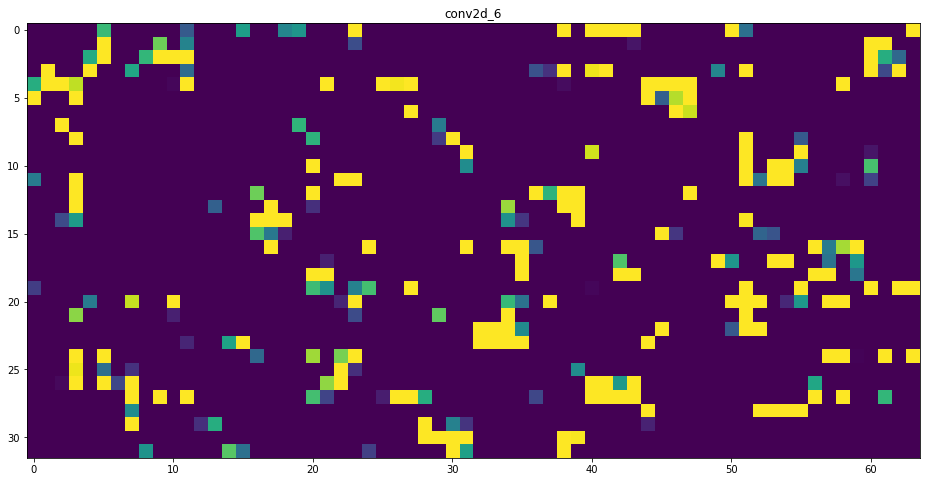

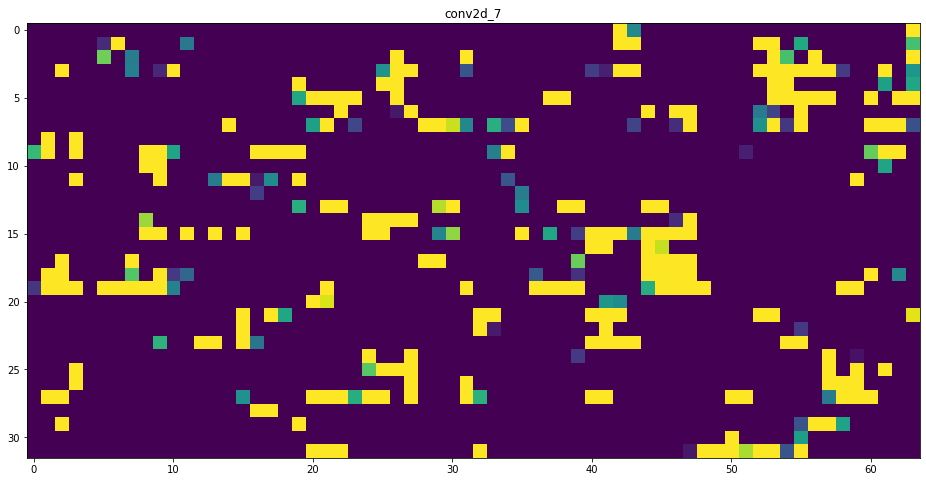

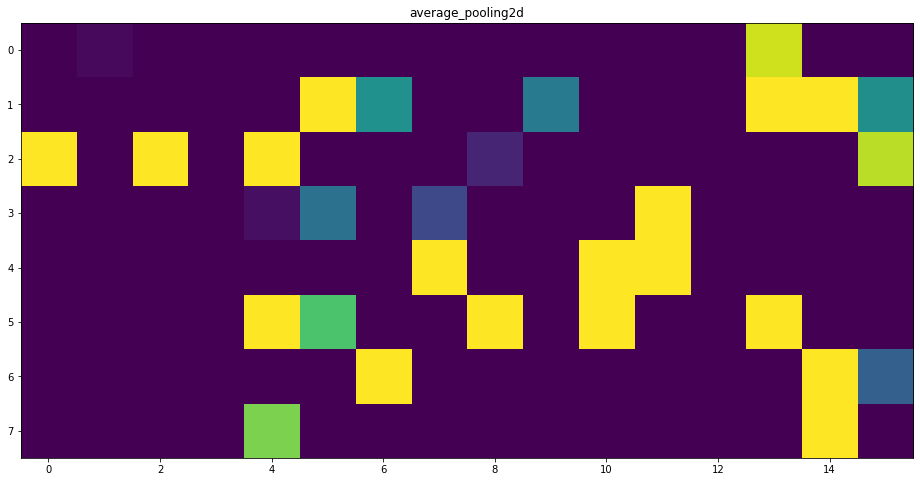

In [ ]:
print("The Example Image")
# plot raw pixel data
plt.imshow(X_train[0])
# show the figure
plt.show()

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, example))[:12]: # Displays the feature maps
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

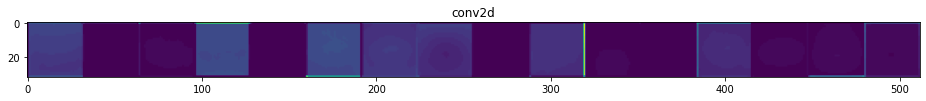

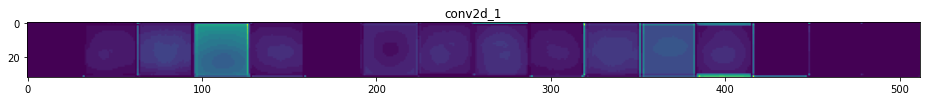

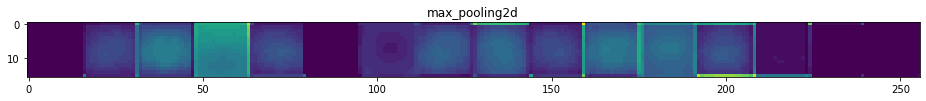

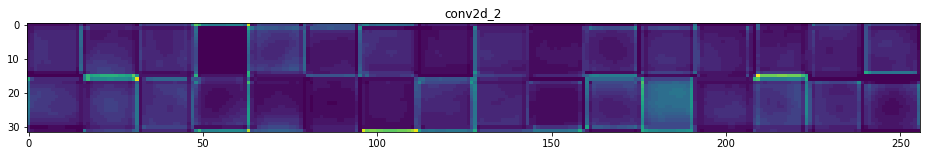

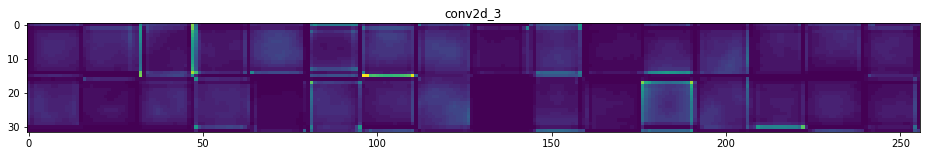

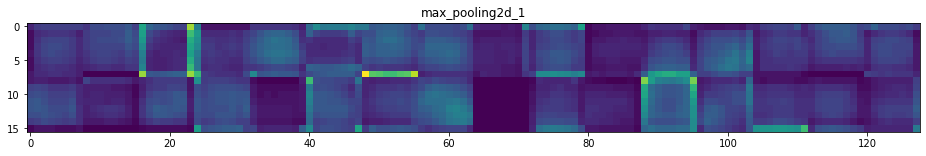

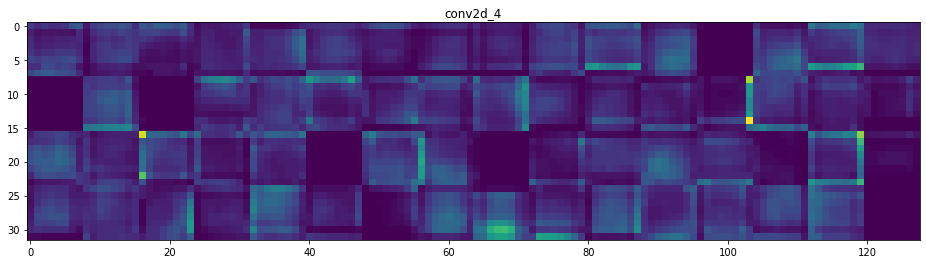

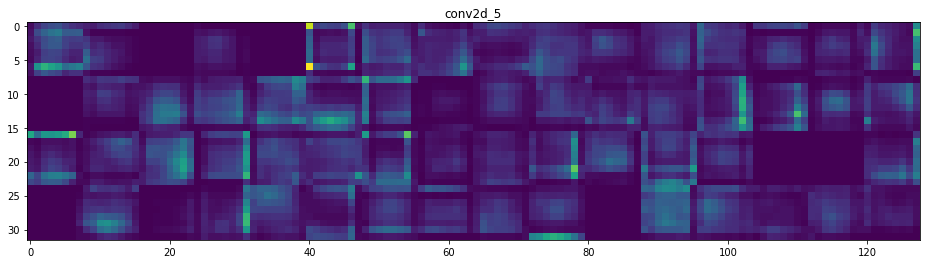

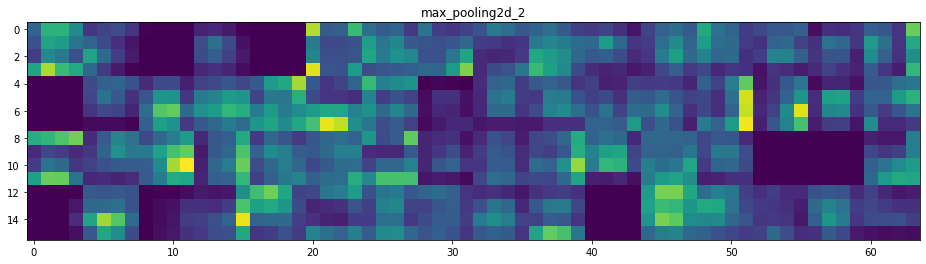

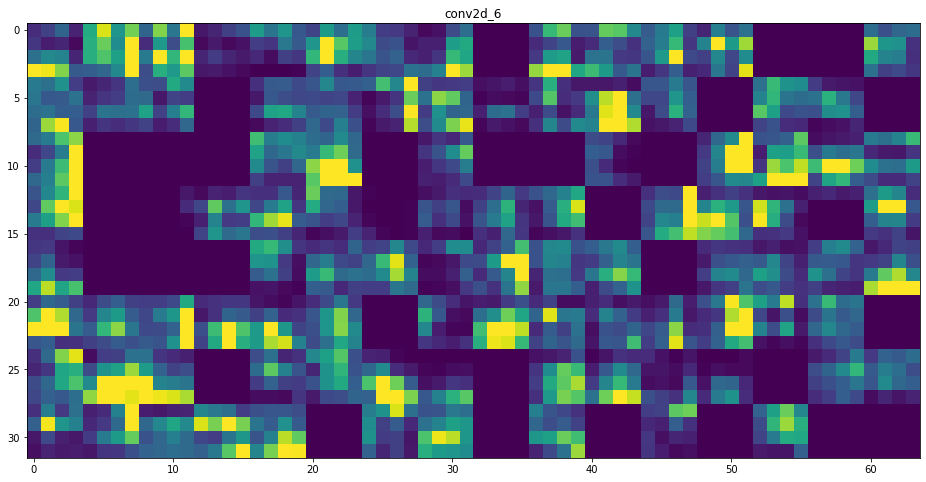

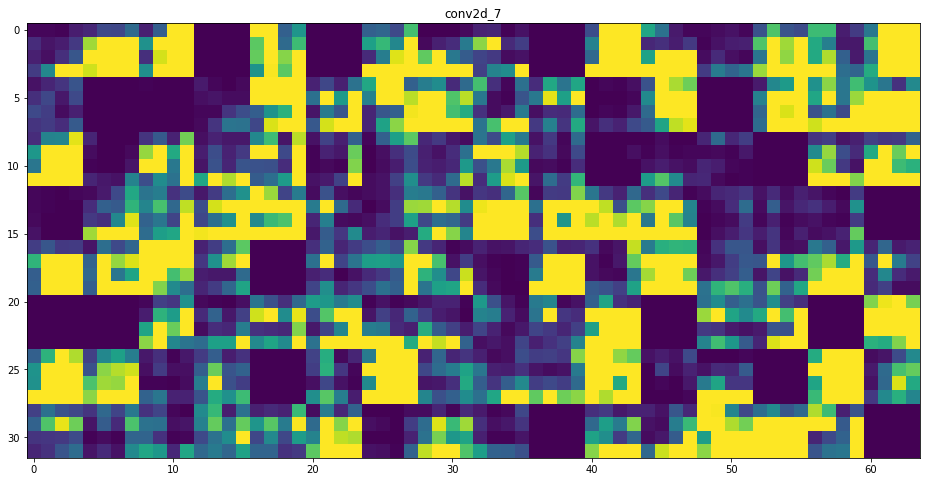

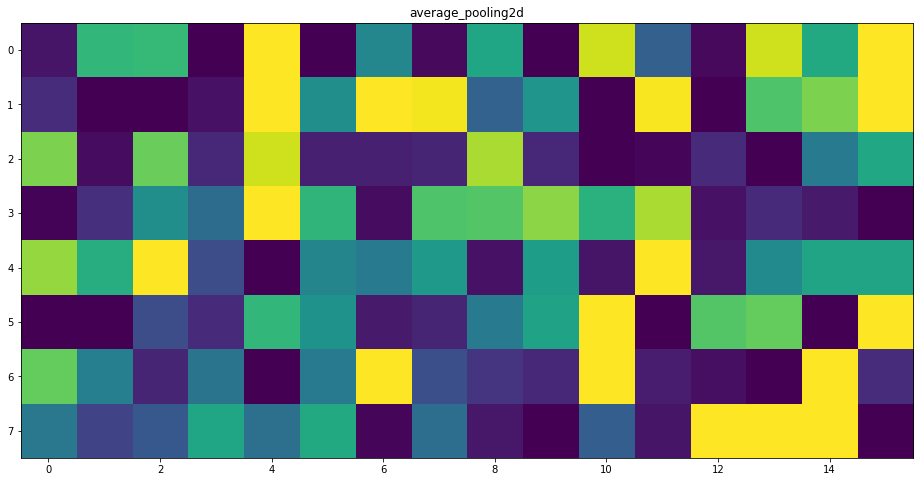

In [ ]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, activations))[:12]: # Displays the feature maps
  layer_activation = layer_activation.numpy()
  layer_activation = np.expand_dims(np.mean(layer_activation, axis = 0), axis = 0)
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
abs_avgs = []
for act in activations:
  abs_avgs.append(np.mean(np.absolute(act.numpy().flatten())))
df = pd.DataFrame(list(zip(layer_names, abs_avgs)), columns = ['Layers', 'Average Absolute Values of Activations'])

In [ ]:
scaler = MinMaxScaler()
df["Normalized Average Absolute Values of Activations"] = scaler.fit_transform(df["Average Absolute Values of Activations"].values.reshape(-1, 1))
df

,Layers,Average Absolute Values of Activations,Normalized Average Absolute Values of Activations
0,conv2d,0.067001,0.012922
1,conv2d_1,0.051074,0.000000
2,max_pooling2d,0.096058,0.036497
3,conv2d_2,0.072856,0.017672
4,conv2d_3,0.074346,0.018881
5,max_pooling2d_1,0.173898,0.099651
6,conv2d_4,0.189305,0.112151
7,conv2d_5,0.206775,0.126326
8,max_pooling2d_2,0.550577,0.405264
9,conv2d_6,0.561104,0.413806


Epoch 1/100
157/157 [==============================] - ETA: 0s - loss: 1.8840 - accuracy: 0.2925
Epoch 00001: val_accuracy improved from -inf to 0.41190, saving model to best_model.h5
157/157 [==============================] - 11s 15ms/step - loss: 1.8840 - accuracy: 0.2925 - val_loss: 1.5887 - val_accuracy: 0.4119
Epoch 2/100
155/157 [============================>.] - ETA: 0s - loss: 1.5247 - accuracy: 0.4356
Epoch 00002: val_accuracy improved from 0.41190 to 0.44860, saving model to best_model.h5
157/157 [==============================] - 2s 13ms/step - loss: 1.5236 - accuracy: 0.4361 - val_loss: 1.5236 - val_accuracy: 0.4486
Epoch 3/100
157/157 [==============================] - ETA: 0s - loss: 1.3285 - accuracy: 0.5121
Epoch 00003: val_accuracy improved from 0.44860 to 0.55130, saving model to best_model.h5
157/157 [==============================] - 2s 13ms/step - loss: 1.3285 - accuracy: 0.5121 - val_loss: 1.2344 - val_accuracy: 0.5513
Epoch 4/100
156/157 [========================

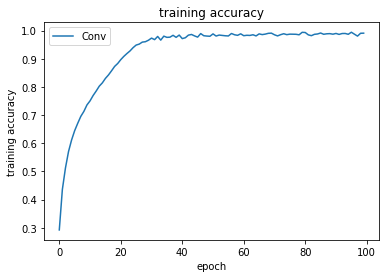

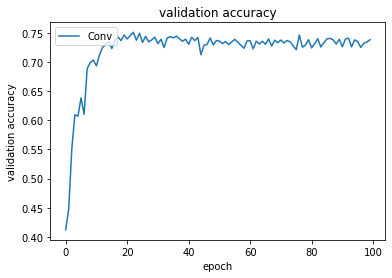

313/313 [==============================] - 1s 4ms/step - loss: 1.0520 - accuracy: 0.7434
Test accuracy: 0.743399977684021


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

history = model.fit(train_X, train_y,
                   batch_size=256,
                   epochs=100,
                   validation_data=(val_X, val_y),
                   shuffle=True,
                   callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])